In [2]:
%matplotlib inline
import pymc3 as pm
from simpanel.glm import Glm
from simpanel.panel import SimPanel
import pandas as pd

In [3]:
data = pd.read_csv('tests/data/testdata.csv')

In [4]:
data.head()

,SOI_1_Ygr,US_gov_yield,REER,GB_USGB,d-unempl-4q,Country
0,0.0,2.128232,-0.016129,4.756667,-0.3,Australia
1,0.0,2.163323,-0.003005,4.886667,0.2,Australia
2,0.0,2.163323,0.005982,4.723333,1.1,Australia
3,0.0,2.128232,-0.057629,4.153333,1.9,Australia
4,0.0,2.079442,-0.055513,3.460000,2.6,Australia


In [5]:
aus = data.ix[data.Country=='Australia', :-1]

In [6]:
aus.head()

,SOI_1_Ygr,US_gov_yield,REER,GB_USGB,d-unempl-4q
0,0.0,2.128232,-0.016129,4.756667,-0.3
1,0.0,2.163323,-0.003005,4.886667,0.2
2,0.0,2.163323,0.005982,4.723333,1.1
3,0.0,2.128232,-0.057629,4.153333,1.9
4,0.0,2.079442,-0.055513,3.460000,2.6


In [7]:
with pm.Model() as model:
    g = Glm.from_xy('glm', aus.iloc[:,1:], aus.iloc[:,0])
    fit = g.advi()

Applied log-transform to glm_sd and added transformed glm_sd_log_ to model.
WARNING (theano.tensor.blas): We did not found a dynamic library into the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


Iteration 0 [0%]: ELBO = -2130.28
Iteration 500 [10%]: Average ELBO = -1152.42
Iteration 1000 [20%]: Average ELBO = -869.14
Iteration 1500 [30%]: Average ELBO = -638.37
Iteration 2000 [40%]: Average ELBO = -489.08
Iteration 2500 [50%]: Average ELBO = -377.75
Iteration 3000 [60%]: Average ELBO = -331.88
Iteration 3500 [70%]: Average ELBO = -292.81
Iteration 4000 [80%]: Average ELBO = -252.45
Iteration 4500 [90%]: Average ELBO = -252.84
Finished [100%]: Average ELBO = -222.89


In [8]:
g.advifit

ADVIFit(means={'glm_sd_log_': array(0.44773062890771403), 'glm_US_gov_yield': array(0.008630586390469834), 'glm_GB_USGB': array(0.006144904050993116), 'glm_d-unempl-4q': array(-0.0017532259102883674), 'glm_REER': array(-0.0060832250904101276)}, stds={'glm_sd_log_': 0.4834793519570883, 'glm_US_gov_yield': 0.51379154098720969, 'glm_GB_USGB': 0.47798841023333805, 'glm_d-unempl-4q': 0.46521091901617989, 'glm_REER': 0.99918256842702946}, elbo_vals=array([-2130.27733385,  -650.83214143,  -257.47668757, ...,  -234.46793461,
        -255.70639402,  -226.21815236]))

In [9]:
with model:
    trace = g.nuts()

100%|██████████| 300/300 [00:34<00:00,  8.75it/s]


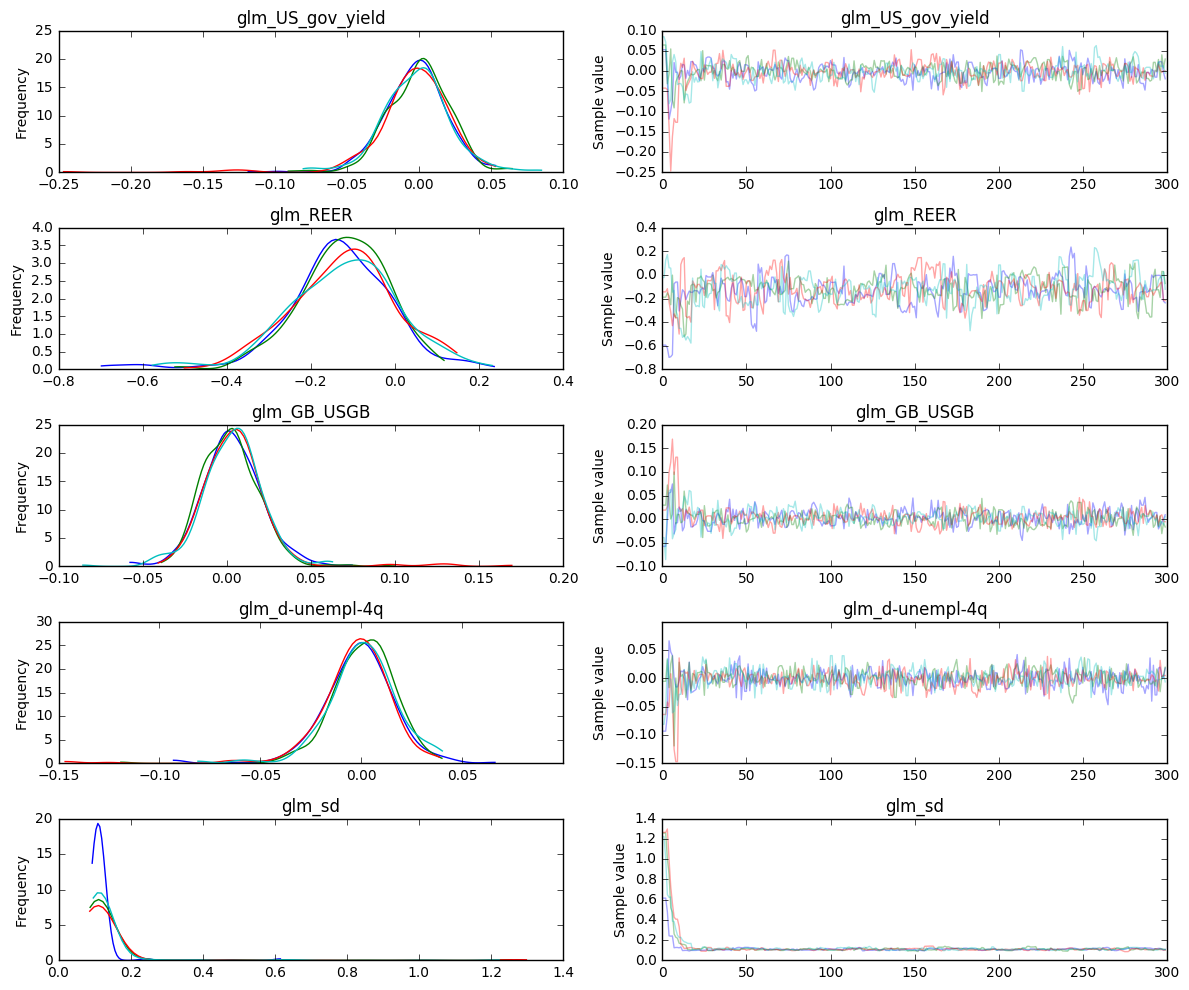

In [10]:
pm.traceplot(trace);